In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate

from torchvision import datasets, transforms


# Load CIFAR-10 dataset
def load_cifar10_sample():
    """
    Load a small sample from CIFAR-10 for experiments
    Return: tensor of shape (100, 3, 32, 32)
    """
   
    transform = transforms.ToTensor() 

    ds = datasets.CIFAR10(root="./data", train=True,
                          download=True, transform=transform)
    imgs, _ = next(iter(torch.utils.data.DataLoader(
        ds, batch_size=100, shuffle=False)))
    return imgs
    

# Implement rotation function
def rotate_image(image, angle, mode='constant', cval=0):
    """
    Rotate image by given angle
    Args:
        image: torch.Tensor of shape (C, H, W)
        angle: rotation angle in degrees
        mode: padding mode for scipy.ndimage.rotate
              one of {'constant', 'reflect', 'wrap'}
        cval: constant value used when mode='constant'
    Returns:
        A torch.Tensor of shape (C, H, W), rotated by `angle` degrees.
    """
 
    np_img = image.detach().cpu().numpy()
    out = np.empty_like(np_img)
    for c in range(np_img.shape[0]):           # per-channel rotation
        out[c] = rotate(np_img[c], angle, reshape=False, mode=mode, cval=cval)
    return torch.from_numpy(out)

In [2]:
def analyze_rotation_artifacts(
    img,
    angles=(0, 45, 90, 135, 180, 225, 270, 315),
    modes=("constant", "reflect", "wrap"),
):
    """
    Return dict {mode: {'errors': [...], 'rotated': [...]}} comparing
    rotation artifacts across padding modes.
    """
    results = {m: {"errors": [], "rotated": []} for m in modes}

    for m in modes:
        for a in angles:
            r  = rotate_image(img,  a, mode=m)
            rb = rotate_image(r,   -a, mode=m)
            results[m]["rotated"].append(r)
            results[m]["errors"].append(((img - rb) ** 2).mean().item())

    # --- visualisation ---
    rows, cols = len(modes), len(angles)
    fig, ax = plt.subplots(rows, cols, figsize=(3 * cols, 3 * rows))
    for i, m in enumerate(modes):
        for j, (a, r) in enumerate(zip(angles, results[m]["rotated"])):
            ax[i, j].imshow(r.permute(1, 2, 0))
            ax[i, j].set(title=f"{m}, {a}°", xticks=[], yticks=[])
    fig.tight_layout()

    plt.figure(figsize=(8, 4))
    for m in modes:
        plt.plot(angles, results[m]["errors"], marker="o", label=m)
    plt.title("Rotation artifacts (MSE)"); plt.xlabel("angle"); plt.ylabel("MSE")
    plt.legend(); plt.grid(True); plt.show()

    return results


Files already downloaded and verified
torch.Size([100, 3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0049669].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0049669].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0049669].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0049669].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.013275294..1.0049669].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.013275294..1.0049669].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.013275294..1.0049669].
Clipping i

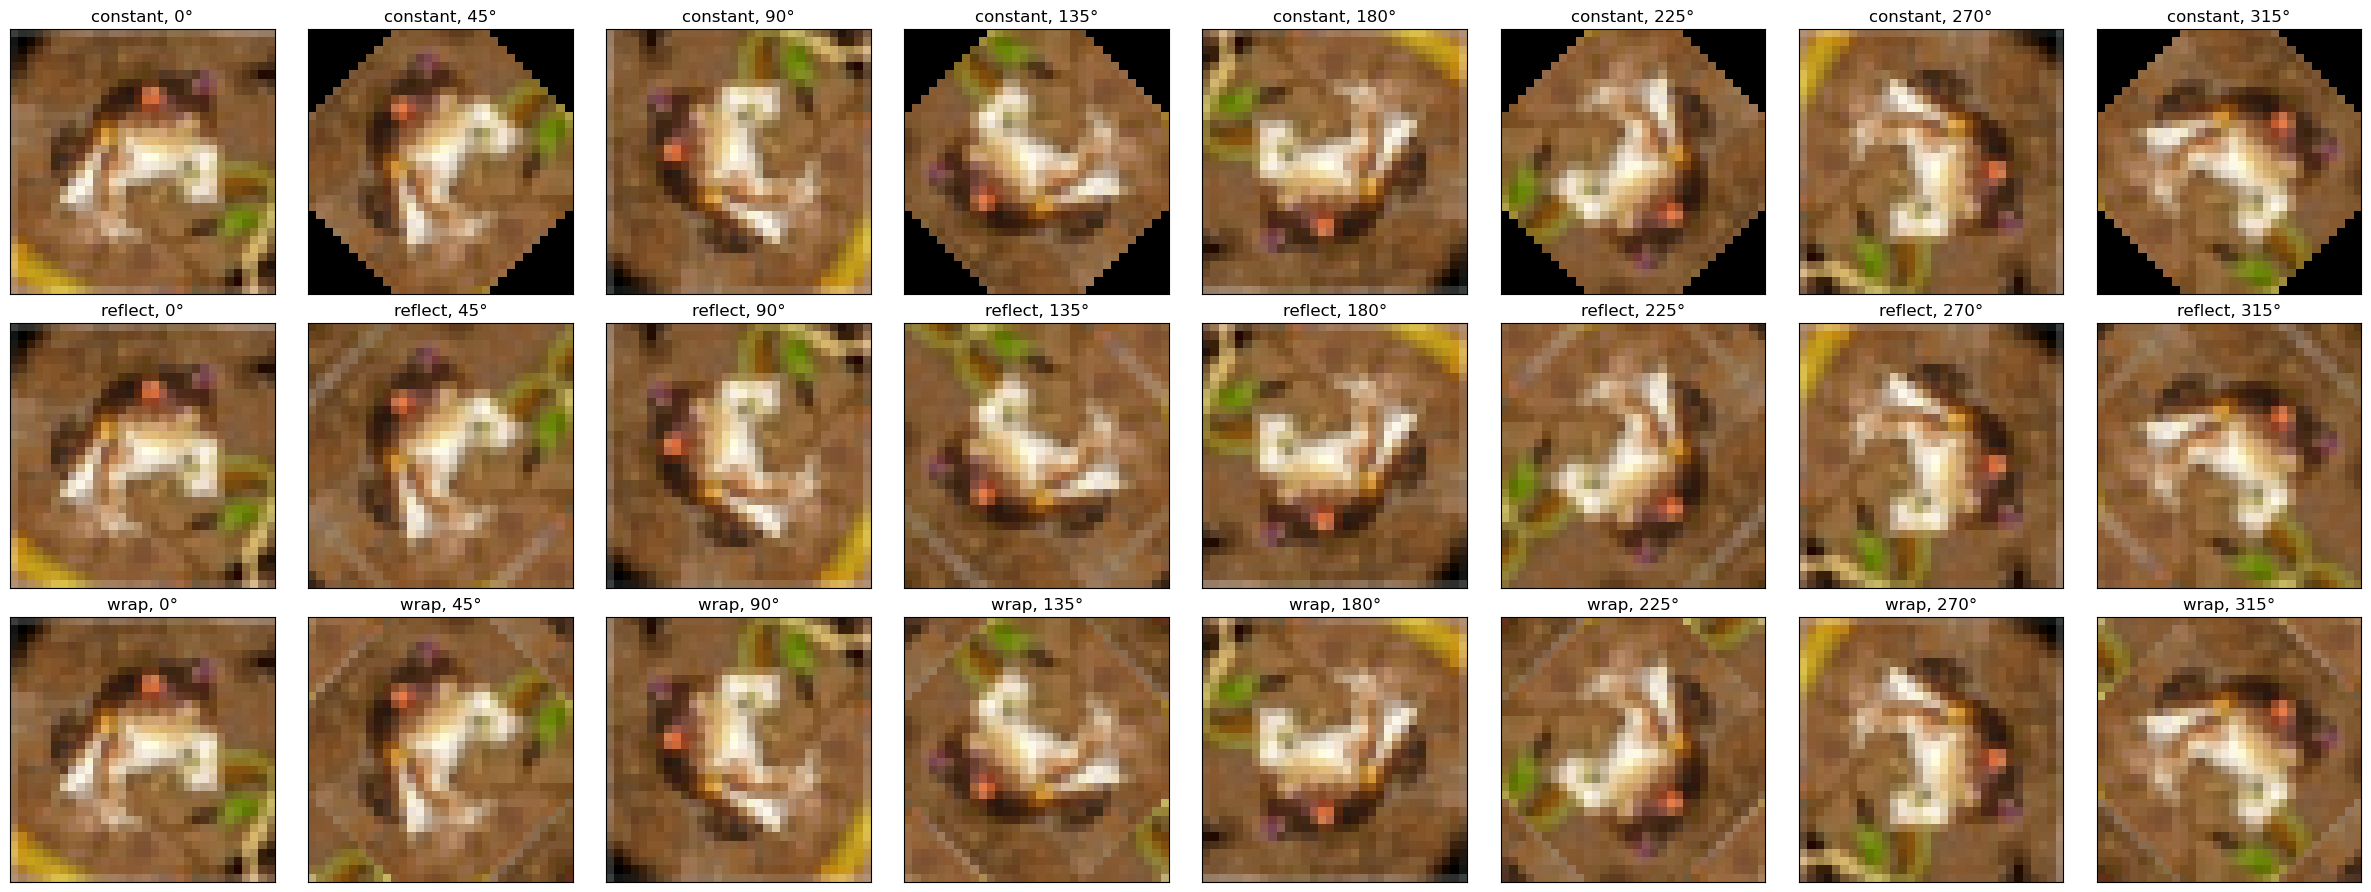

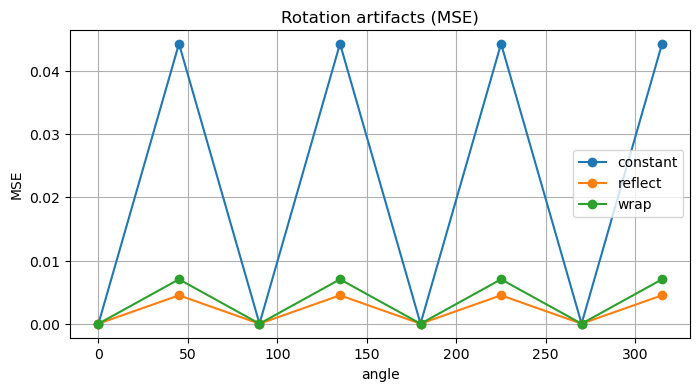

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.0019644834..1.0419863].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.0019644834..1.0419863].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.0019644834..1.0419863].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.0019644834..1.0419863].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.0019656054..1.0358422].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.0019656054..1.0358422].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Go

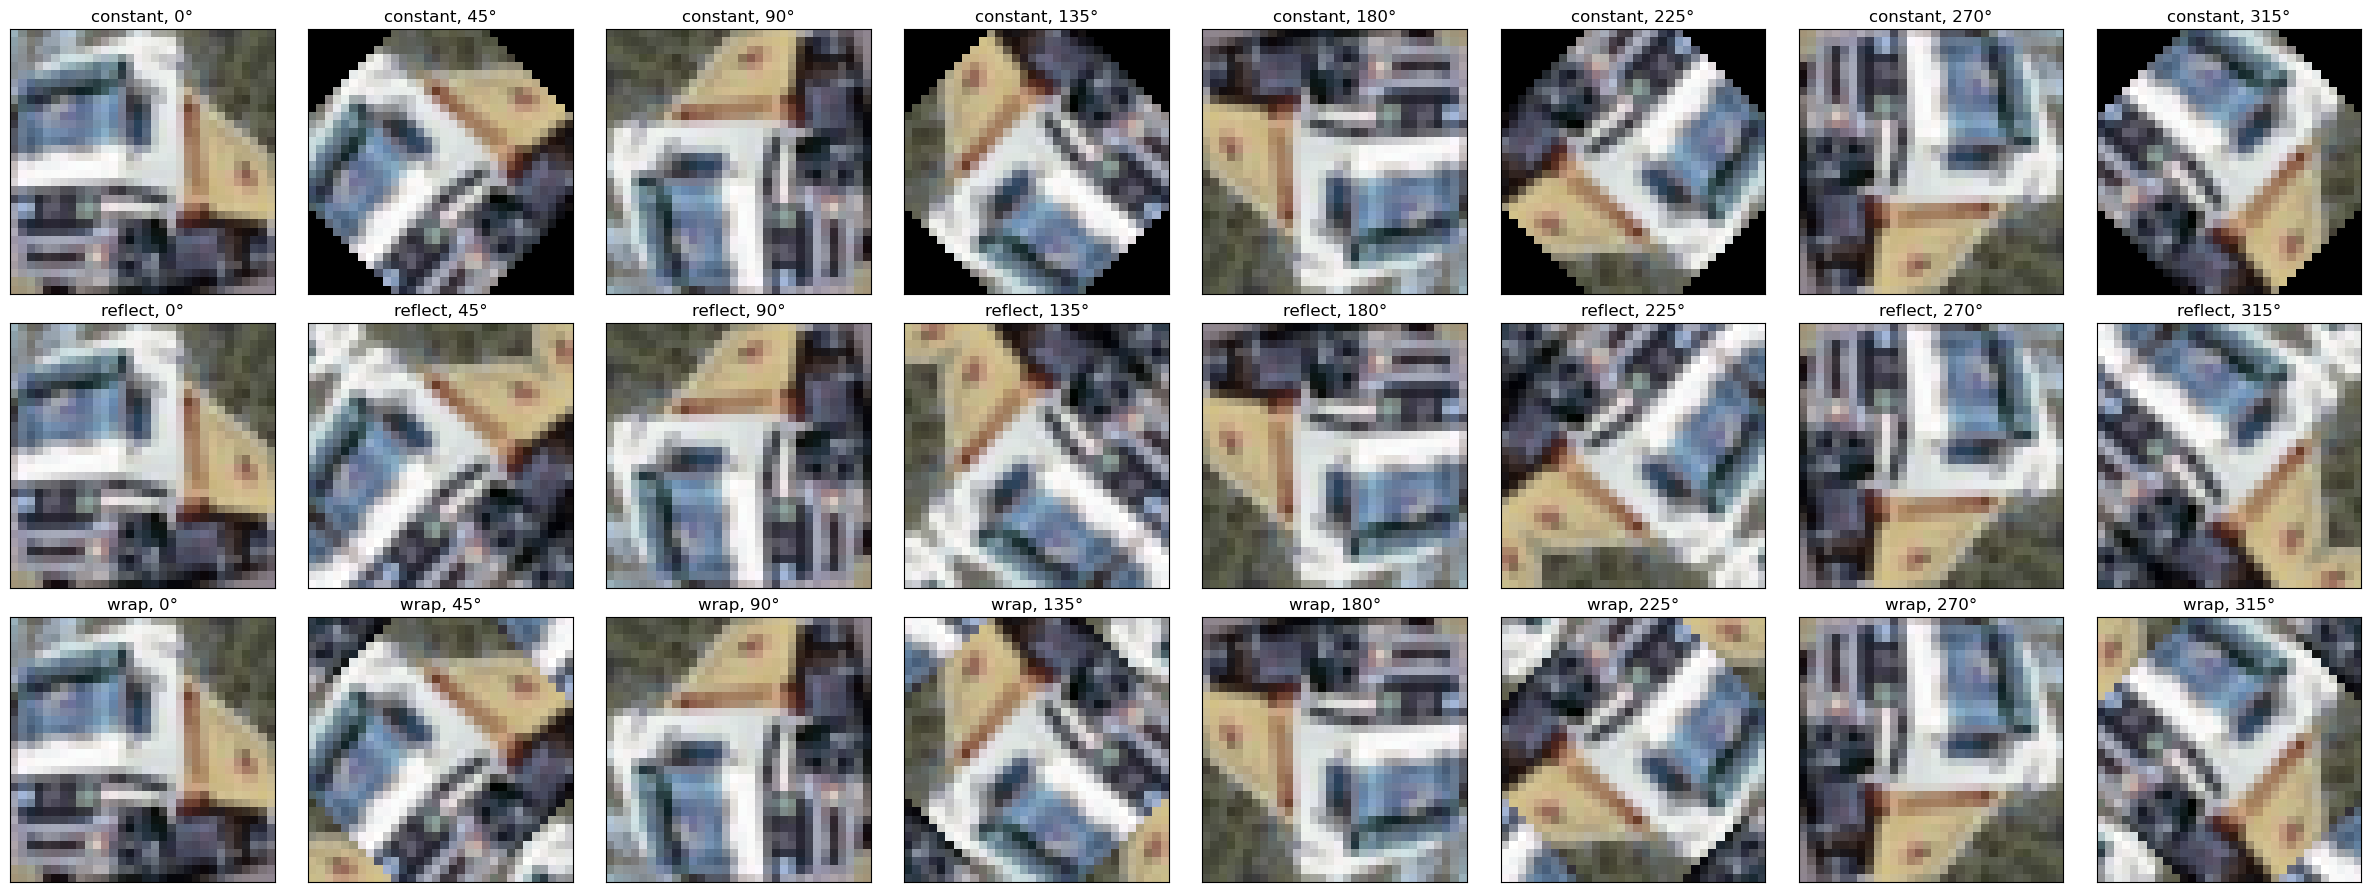

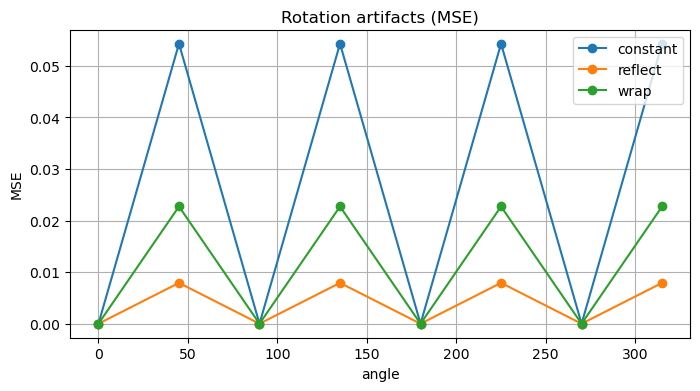

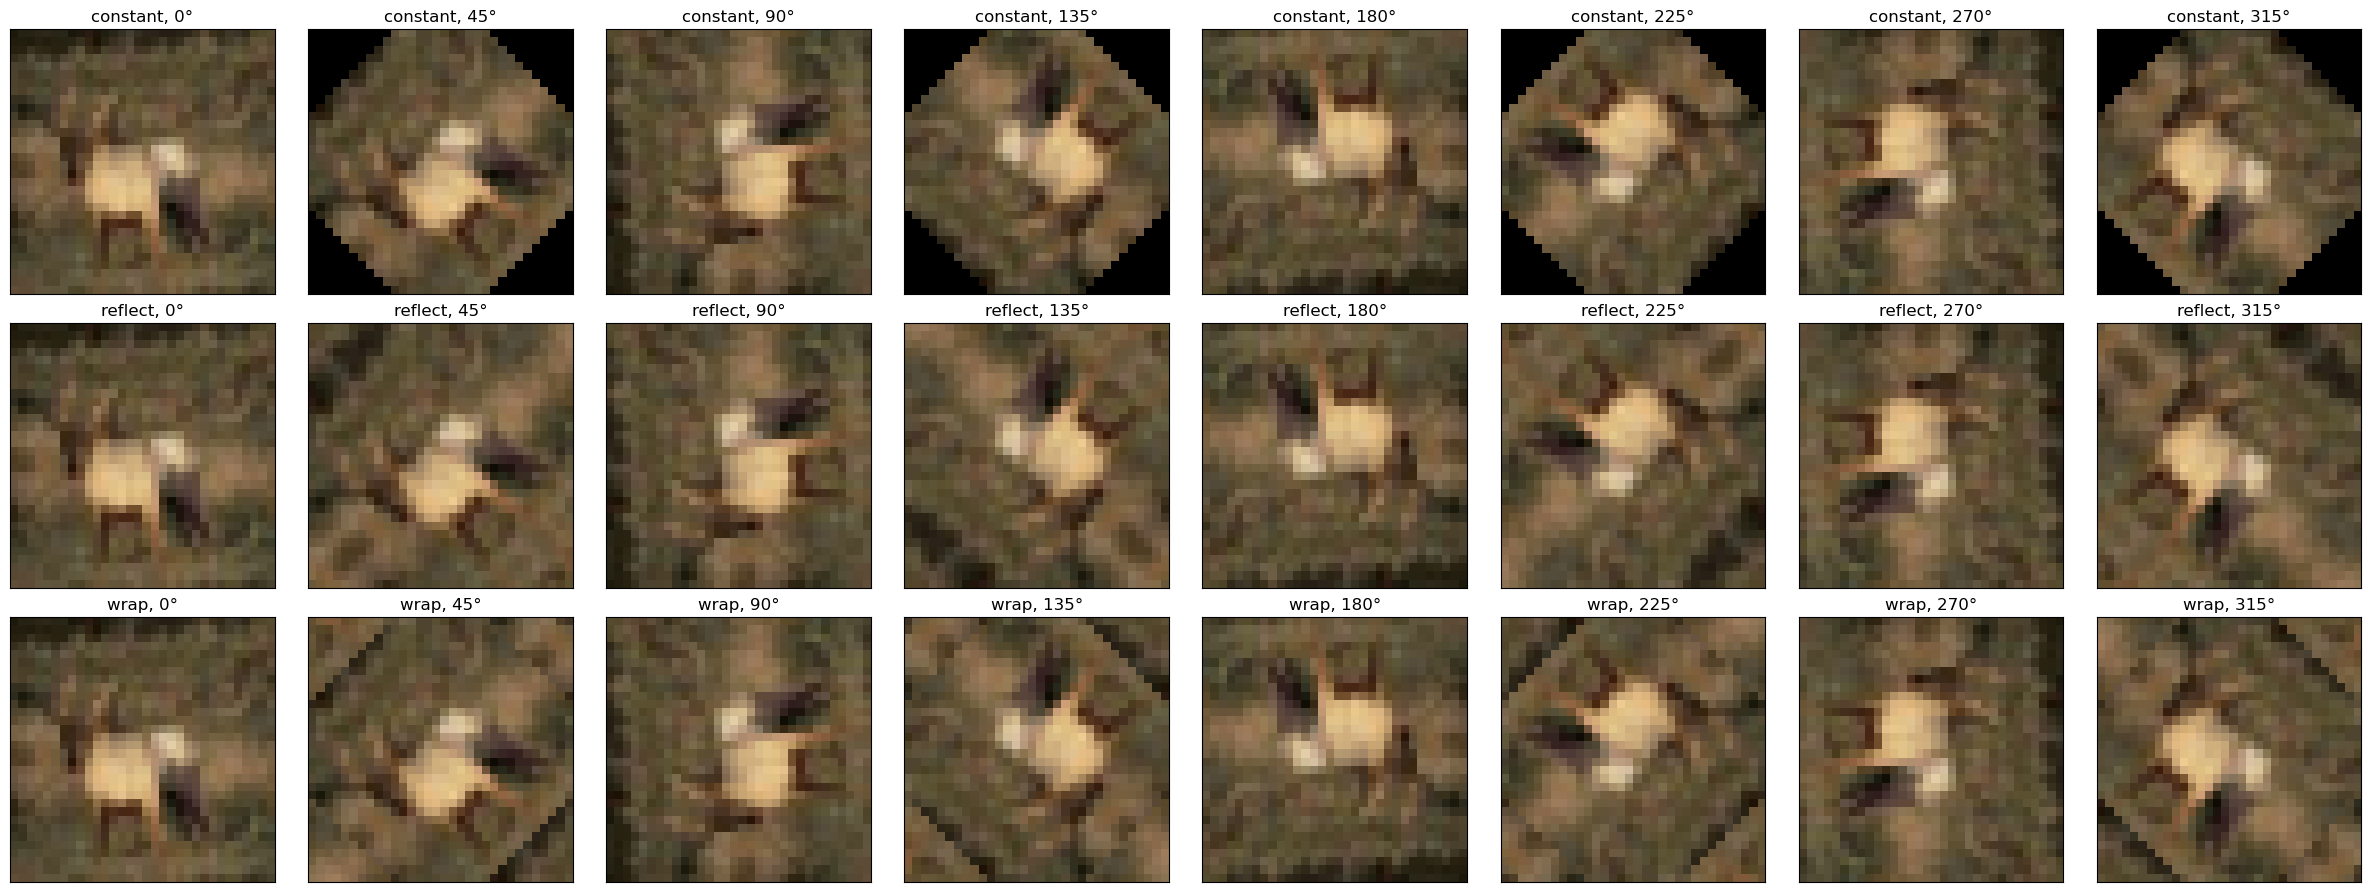

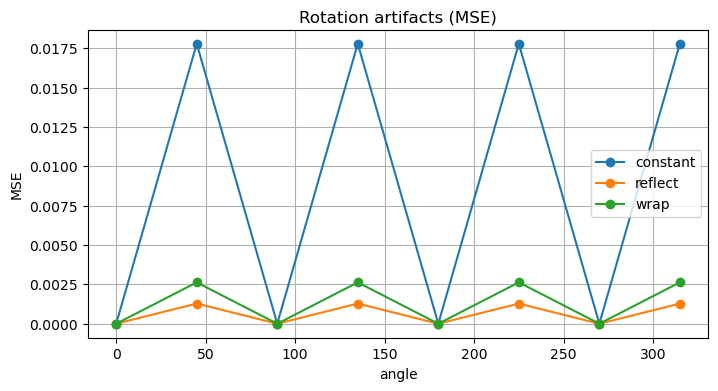

In [3]:
samples = load_cifar10_sample()
print(samples.shape)

analyze_rotation_artifacts(samples[0])
analyze_rotation_artifacts(samples[1])
analyze_rotation_artifacts(samples[3
                                   ]);

In [4]:


def quantitative_rotation_analysis(images, conv_layer, display_maps_for_angle: int | None = None):
    """
    Quantitatively analyze how rotation affects CNN features
    
    Args:
        images: batch of images (N, C, H, W)
        conv_layer: a Conv2d layer with 7x7 kernel
    
    Tasks:
    1. Apply convolution to original images
    2. For each rotation angle in [0, 45, 90, ..., 315]:
       a. Rotate input image
       b. Apply convolution
       c. Rotate feature map back
       d. Calculate MSE with original feature map
    3. Compare errors with and without padding
    4. Plot error as function of rotation angle
    
    Return: Dictionary with error metrics
    """
    # TODO: Implement the analysis
    
    # Define your 7x7 convolutional layer here
    conv_7x7 = nn.Conv2d(3, 64, kernel_size=7, padding=3)
    
    errors_with_padding = {}
    errors_without_padding = {}
    
    # Your implementation here

    if not isinstance(conv_layer, nn.Conv2d) or conv_layer.kernel_size != (7, 7):
        raise ValueError("conv_layer must be a nn.Conv2d layer with a 7x7 kernel.")

    errors_with_padding = {}
    errors_without_padding = {}
    
    angles_to_analyze = [i * 45.0 for i in range(8)]
    device = images.device
    batch_size = images.shape[0]
    
    conv_weights = conv_layer.weight.detach()
    conv_bias = conv_layer.bias.detach() if conv_layer.bias is not None else None
    stride, dilation, groups = conv_layer.stride, conv_layer.dilation, conv_layer.groups
    
    # Helper function to apply custom rotation to a batch
    def rotate_batch_custom(batch_tensor, angle_deg):
        rotated_list = [rotate_image(batch_tensor[i], angle_deg,) 
                        for i in range(batch_tensor.shape[0])]
        return torch.stack(rotated_list, dim=0)


    padding_val_with = 3 
    fm_orig_with_padding = F.conv2d(images, conv_weights, conv_bias, stride, padding_val_with, dilation, groups)
    
    for angle_deg in angles_to_analyze:
        img_rotated = rotate_batch_custom(images, angle_deg)
        fm_rotated_conv = F.conv2d(img_rotated, conv_weights, conv_bias, stride, padding_val_with, dilation, groups)
        fm_restored = rotate_batch_custom(fm_rotated_conv, -angle_deg)
        errors_with_padding[angle_deg] = F.mse_loss(fm_restored, fm_orig_with_padding).item()


    padding_val_without = 0
    fm_orig_without_padding = F.conv2d(images, conv_weights, conv_bias, stride, padding_val_without, dilation, groups)
    
    for angle_deg in angles_to_analyze:
        img_rotated = rotate_batch_custom(images, angle_deg)
        fm_rotated_conv_no_pad = F.conv2d(img_rotated, conv_weights, conv_bias, stride, padding_val_without, dilation, groups)
        fm_restored_no_pad = rotate_batch_custom(fm_rotated_conv_no_pad, -angle_deg)
        errors_without_padding[angle_deg] = F.mse_loss(fm_restored_no_pad, fm_orig_without_padding).item()
    
    
    # --- Display feature maps for a specific angle (e.g., first image, with padding) ---
    if display_maps_for_angle is not None and batch_size > 0:
        print(f"\nDisplaying feature maps from within analysis function for angle: {display_maps_for_angle}° (with padding)")
        
        example_image_batch = images[0:1] # First image, kept as a batch of 1

        # 1. Original image and its feature map
        fm_orig_viz = F.conv2d(example_image_batch, conv_weights, conv_bias, stride, padding_val_with, dilation, groups)

        # 2. Rotate image
        img_rotated_viz = rotate_batch_custom(example_image_batch, display_maps_for_angle)
        
        # 3. Convolve rotated image
        fm_rotated_conv_viz = F.conv2d(img_rotated_viz, conv_weights, conv_bias, stride, padding_val_with, dilation, groups)
        
        # 4. Rotate feature map back
        fm_restored_viz = rotate_batch_custom(fm_rotated_conv_viz, -display_maps_for_angle)
        
        # 5. Difference map
        diff_map_viz = fm_orig_viz - fm_restored_viz

        # Plotting
        fig, axs = plt.subplots(2, 3, figsize=(15, 10))
        title_suffix = f"(Angle: {display_maps_for_angle}°, Scipy Rot, Pad: {padding_val_with})"
        fig.suptitle(f"Feature Map Visualization {title_suffix}", fontsize=16)

        axs[0, 0].imshow(example_image_batch[0, 0].cpu().numpy(), cmap='gray'); axs[0, 0].set_title("1. Original Image"); axs[0, 0].axis('off')
        axs[0, 1].imshow(fm_orig_viz[0, 0].cpu().numpy(), cmap='viridis'); axs[0, 1].set_title("2. Original Feat. Map"); axs[0, 1].axis('off')
        axs[0, 2].imshow(img_rotated_viz[0, 0].cpu().numpy(), cmap='gray'); axs[0, 2].set_title(f"3. Image Rotated"); axs[0, 2].axis('off')
        axs[1, 0].imshow(fm_rotated_conv_viz[0, 0].cpu().numpy(), cmap='viridis'); axs[1, 0].set_title("4. Feat. Map (Rot Img)"); axs[1, 0].axis('off')
        axs[1, 1].imshow(fm_restored_viz[0, 0].cpu().numpy(), cmap='viridis'); axs[1, 1].set_title("5. Feat. Map (Rot Back)"); axs[1, 1].axis('off')
        
        diff_data = diff_map_viz[0, 0].cpu().numpy()
        vmax_abs = np.abs(diff_data).max()
        threshold = 1e-3
        if vmax_abs < threshold:
            vmax_abs = threshold

        axs[1, 2].imshow(diff_data,
                        cmap='coolwarm',
                        vmin=-vmax_abs,
                        vmax=vmax_abs)
        axs[1, 2].imshow(diff_data, cmap='coolwarm', vmin=-vmax_abs if vmax_abs > 0 else -1, vmax=vmax_abs if vmax_abs > 0 else 1)
        axs[1, 2].set_title("6. Difference Map"); axs[1, 2].axis('off')
        
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

    return {
        'with_padding': errors_with_padding,
        'without_padding': errors_without_padding
    }


torch.Size([1, 3, 32, 32])

Displaying feature maps from within analysis function for angle: 90° (with padding)


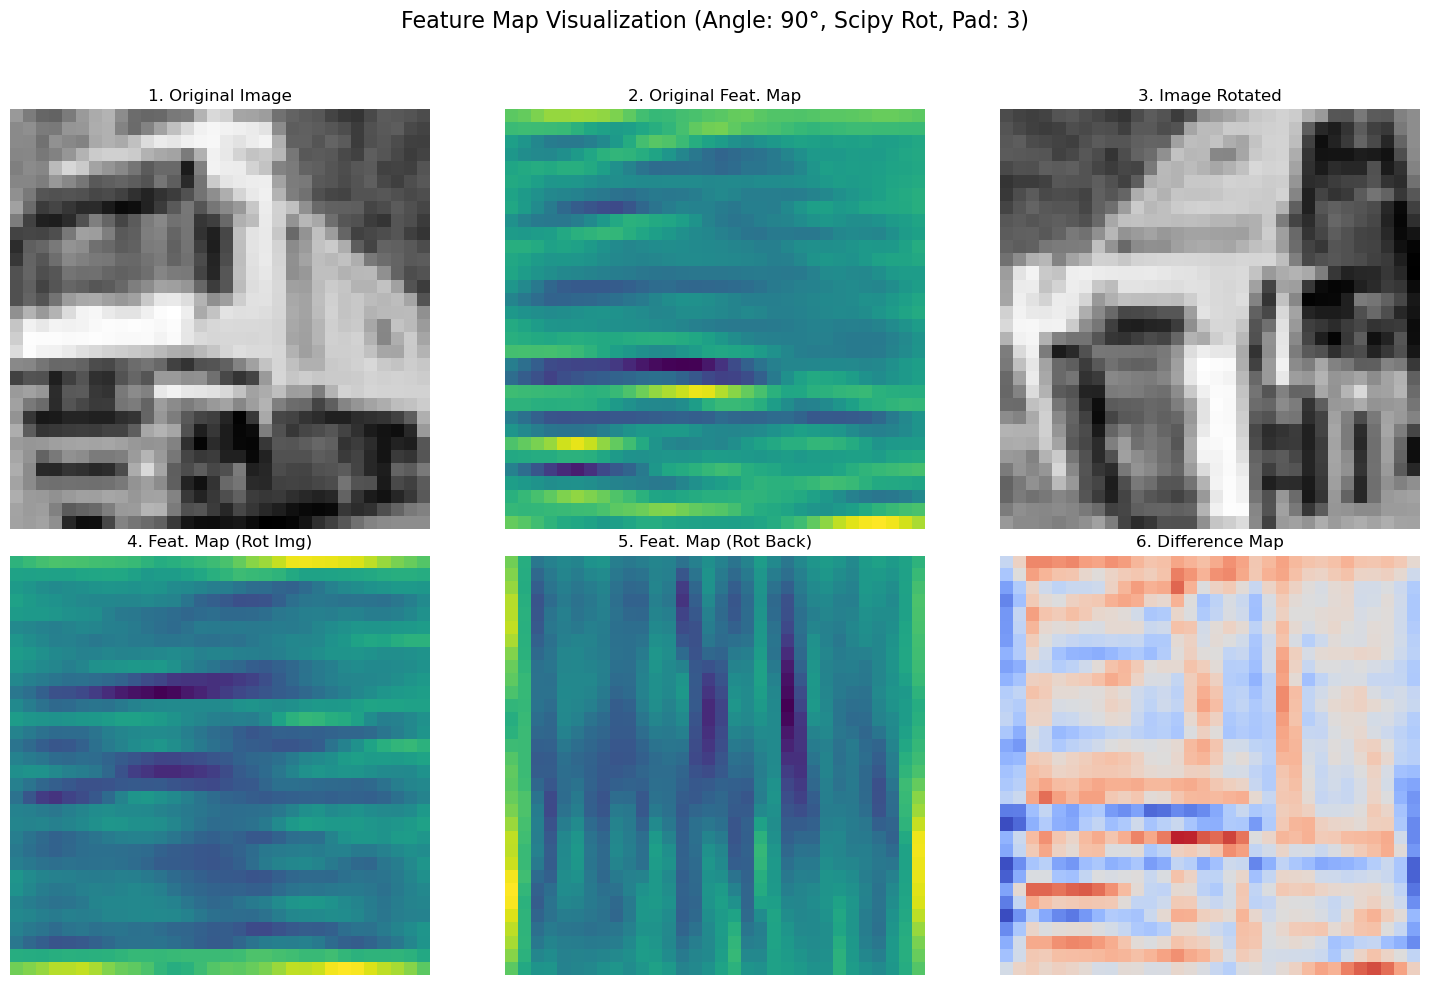


--- Quantitative MSE results ---

Errors with padding:
    0° : 0.00000000
   45° : 18.58631706
   90° : 24.47754288
  135° : 17.07510185
  180° : 0.00000000
  225° : 18.58631516
  270° : 24.47754288
  315° : 17.07510185

Errors without padding:
    0° : 0.00000000
   45° : 22.19781685
   90° : 19.62982559
  135° : 21.06980133
  180° : 0.00000000
  225° : 22.19781685
  270° : 19.62982559
  315° : 21.06980324

Saved plot to rotation_analysis_mse_plot_scipy.png


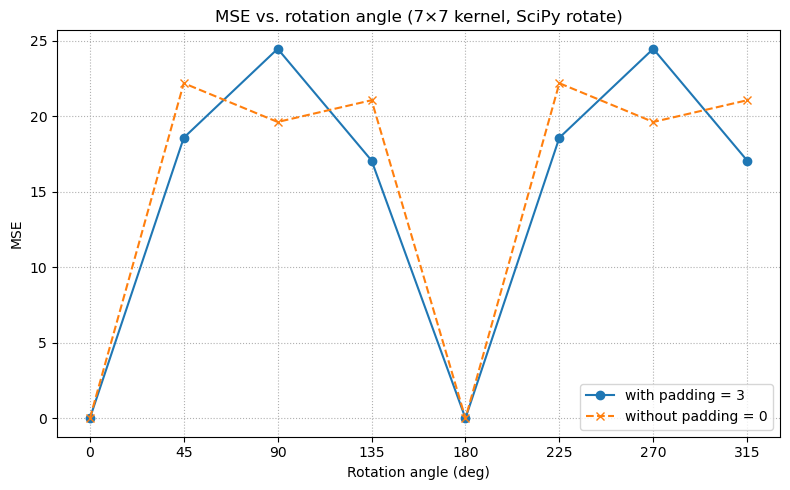

In [5]:
img = samples[3].unsqueeze(0)

print(img.shape)

sample_images_batch = img # Centered bar

out_channels = 1
conv_layer_7x7_config = nn.Conv2d(
    in_channels=3,
    out_channels=out_channels,
    kernel_size=7,
    stride=1,
    padding=0,           # we pad manually during conv
    bias=False
)

# Create a horizontal-edge detector duplicated across RGB
kernel = torch.zeros(out_channels, 3, 7, 7, dtype=torch.float32)
kernel[:, :, 1:3, :] = -0.5
kernel[:, :, 3,   :] =  1.5
kernel[:, :, 4:6, :] = -0.5

with torch.no_grad():                       
    conv_layer_7x7_config.weight.copy_(kernel)


img_batch = samples[1:2]  # pick one image
results = quantitative_rotation_analysis(
    img_batch,
    conv_layer_7x7_config,
    display_maps_for_angle=90

)


print("\n--- Quantitative MSE results ---")
for label, errs in results.items():
    print(f"\nErrors {label.replace('_', ' ')}:")
    for ang in sorted(errs):
        print(f"  {ang:3.0f}° : {errs[ang]:.8f}")


angles = sorted(results['with_padding'])
plt.figure(figsize=(8, 5))
plt.plot(angles,
         [results['with_padding'][a]  for a in angles],
         'o-', label='with padding = 3')
plt.plot(angles,
         [results['without_padding'][a] for a in angles],
         'x--', label='without padding = 0')
plt.xlabel('Rotation angle (deg)')
plt.ylabel('MSE')
plt.title('MSE vs. rotation angle (7×7 kernel, SciPy rotate)')
plt.xticks(angles)
plt.grid(True, ls=':')
plt.legend()
plt.tight_layout()
plt.savefig('rotation_analysis_mse_plot_scipy.png')
print("\nSaved plot to rotation_analysis_mse_plot_scipy.png")
plt.show()



In [6]:
class GroupConvC4(nn.Module):
    """
    Group Convolution layer equivariant to C4 group (90 degree rotations)
    """
    
    def __init__(self, in_channels, out_channels, kernel_size=3):
        super().__init__()
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = kernel_size
        
        # TODO: Initialize parameters
        # Hint: You need kernels for each group element
        # Initialize parameters

        self.kernel = nn.Parameter(
            torch.empty(out_channels, in_channels, kernel_size, kernel_size)
        )
        # Initialize weights (e.g., Kaiming normal)
        nn.init.kaiming_normal_(self.kernel, mode='fan_in', nonlinearity='relu')
        
        # Padding to maintain spatial dimensions for stride 1
        self.padding = kernel_size // 2
        
        # C4 group properties
        self.angles_degrees = [0, 90, 180, 270]
        self.num_group_elements = len(self.angles_degrees)


    def _get_rotation_matrices(self):
        """
        Return the 4 rotation matrices for C4 group.
        These represent the transformations of coordinates under group actions.
        Note: These are not directly used for rotating kernels in this implementation,
        as torch.rot90 is more convenient for image/kernel tensors.
        
        Returns: List of 2x2 rotation matrices (torch tensors)
        """
        # Rotation matrix: [[cos(theta), -sin(theta)], [sin(theta), cos(theta)]]
        # 0 degrees
        R0 = torch.tensor([[1., 0.], [0., 1.]])
        # 90 degrees (counter-clockwise)
        R90 = torch.tensor([[0., -1.], [1., 0.]])
        # 180 degrees
        R180 = torch.tensor([[-1., 0.], [0., -1.]])
        # 270 degrees
        R270 = torch.tensor([[0., 1.], [-1., 0.]])
        return [R0, R90, R180, R270]
    
    
    def _rotate_kernel(self, kernel, angle):
        """
        Rotate a convolution kernel by given angle
        Args:
            kernel: tensor of shape (out_channels, in_channels, H, W)
            angle: rotation angle (0, 90, 180, or 270)
        """
        # TODO: Implement kernel rotation
        # Hint: You need to rotate and permute dimensions correctly
        if angle not in self.angles_degrees:
        
            raise ValueError(f"Angle must be one of [0, 90, 180, 270], got {angle}")
        
        k = angle // 90
        
        # Kernel shape is (out_channels, in_channels, H, W)
        # We rotate the spatial dimensions (H, W), which are dimensions 2 and 3
        return torch.rot90(kernel, k, dims=(-2, -1)) if k else kernel
    
    def lifting_convolution(self, x):
        """
        Lift a function on R^2 to a function on SE(2)
        Args:
            x: input tensor (B, C, H, W)
        Returns:
            lifted tensor (B, C, 4, H, W) - 4 for C4 group
        """
        # TODO: Implement lifting operation
        # Apply convolution with rotated versions of the kernel
        batch_size = x.shape[0]
        
        # Initialize output
        lifted = torch.zeros(batch_size, self.out_channels, 4, 
                           x.shape[2], x.shape[3])
        
        
        # For each rotation in C4
        for i, angle in enumerate([0, 90, 180, 270]):
            # Your implementation here
            # Rotate the canonical kernel
            rotated_kernel = self._rotate_kernel(self.kernel, angle)

            # Convolve input x with the current rotated_kernel
            # x: (B, self.in_channels, H_in, W_in)
            # rotated_kernel: (self.out_channels, self.in_channels, kS, kS)
            # conv_slice: (B, self.out_channels, H_out, W_out)
            conv_slice = F.conv2d(x, rotated_kernel, padding=self.padding)

            lifted[:, :, i, :, :] = conv_slice
            
        return lifted
    
    def group_convolution(self, lifted_x):
        """
        Perform group convolution on lifted feature maps
        Args:
            lifted_x: tensor of shape (B, C, 4, H, W)
        Returns:
            tensor of shape (B, C, 4, H, W)
        """
        # TODO: Implement group convolution
        # This should respect the group structure
        
        batch_size, channels, group_size, H, W = lifted_x.shape
        output = torch.zeros_like(lifted_x)
        
        # For each output group element
        for g in range(group_size):
            # For each input group element
            for h in range(group_size):
                # Calculate g * h^(-1) to determine which kernel to use
                # Your implementation here
                # relative rotation r = g · h⁻¹  (mod 4)
                r = (g - h) % group_size                       # 0,1,2,3
                angle = self.angles_degrees[r]               # 0,90,180,270

                # rotate the canonical kernel accordingly
                rotated_kernel = self._rotate_kernel(self.kernel, angle)
                # conv2d over the spatial slice corresponding to h
                conv_res = F.conv2d(
                    lifted_x[:, :, h, :, :],   # (B, C_in, H, W)
                    rotated_kernel,            # (C_out, C_in, k, k)
                    padding=self.padding
                )
                # accumulate result for output orientation g
                output[:, :, g, :, :] += conv_res
                
        return output
    
    def forward(self, x, lifted_input_type=False): # Renamed arg for clarity
        if not lifted_input_type: # Input is (B, self.in_channels, H, W)
            return self.lifting_convolution(x) # Output (B, self.out_channels, 4, H,W)
        else: # Input is (B, self.in_channels, 4, H, W)
            return self.group_convolution(x) # Output (B, self.out_channels, 4, H,W)

In [7]:
def rotate_tensor(x, angle, mode='constant', cval=0):
    """
    Rotate any tensor whose last two dims are H×W.
    Works for shapes (C,H,W), (B,C,H,W) or (B,C,G,H,W).
    Keeps dtype & device.
    """
    if angle % 90 != 0:
        raise ValueError("angle must be 0/90/180/270")
    k = angle // 90            # 90°→1, 180°→2, 270°→3
    if k == 0:
        return x
    return torch.rot90(x, k, dims=(-2, -1))


def verify_equivariance(group_conv_layer, test_image):
    """
    Verify that your implementation is actually equivariant
    
    Test: For any rotation r and input x:
    group_conv(rotate(x, r)) = rotate(group_conv(x), r)
    
    Args:
        group_conv_layer: Your GroupConvC4 layer
        test_image: Test image tensor (1, C, H, W)
    
    Return: Dictionary with equivariance errors for each rotation
    """
    # TODO: Implement equivariance verification
    
    equivariance_errors = {}
    with torch.no_grad():
        for angle in [90, 180, 270]:
            # 1. Rotate input then apply group conv
            rotated_input = rotate_image(test_image, angle)
            output1 = group_conv_layer(rotated_input.unsqueeze(0))
            
            # 2. Apply group conv then rotate output
            output = group_conv_layer(test_image.unsqueeze(0))
            print(output.shape)
            output2 = rotate_tensor(output, angle)

            # Re-label the four orientation slices (dim = 2) so they stay aligned with the
            # image after a CCW spatial rotation: a 90 ° turn needs a +1 roll, 180 ° a +2, etc.
            output2 = torch.roll(output2, shifts=angle//90, 
                  dims=2)


        
            # 3. Calculate error
            error = torch.mean((output1 - output2) ** 2)
            equivariance_errors[angle] = error
    
    return equivariance_errors

In [8]:
group_conv_layer = GroupConvC4(3, 8, 3)
group_conv_layer.eval()

verify_equivariance(group_conv_layer, samples[2])

torch.Size([1, 8, 4, 32, 32])
torch.Size([1, 8, 4, 32, 32])
torch.Size([1, 8, 4, 32, 32])


{90: tensor(7.5203e-15), 180: tensor(8.3728e-15), 270: tensor(7.5024e-15)}

In [9]:
### optional

class StandardCNN(nn.Module):
    """Standard CNN for CIFAR-10 classification"""
    def __init__(self):
        super().__init__()
        # TODO: Implement a simple CNN architecture
        # Use regular Conv2d layers
        pass

class GroupEquivariantCNN(nn.Module):
    """Group-equivariant CNN for CIFAR-10 classification"""
    def __init__(self):
        super().__init__()
        # TODO: Implement using your GroupConvC4 layers
        # Remember to handle the group dimension appropriately
        pass